In [69]:
import seaborn as sns
from sklearn.model_selection import train_test_split as split
from sklearn.preprocessing import PolynomialFeatures, LabelEncoder
from sklearn.linear_model import LogisticRegression

from Classification_Logistic import ClassificationMetrics
import matplotlib.pyplot as plt

# Loading The Dataset

In [70]:
df = sns.load_dataset('iris')

# Encoding

In [71]:
encoder = LabelEncoder()

In [72]:
df['species'] = encoder.fit_transform(df['species'])

# Dropping Columns 

In [73]:
df = df.drop(columns=['sepal_width', 'petal_width'])

# Splitting and Apply Basic Logistic Regression

In [74]:
train_x, test_x,train_y, test_y = split(df.drop(columns=['species']), df['species'], test_size=0.2)

## Applying Regression

In [75]:
logistic_regression = LogisticRegression(multi_class='ovr')

In [76]:
logistic_regression.fit(train_x, train_y)
predictions = logistic_regression.predict(test_x)

/Users/sadi_/Coding/pythonProject/.venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


## Evaluation

In [77]:
classify = ClassificationMetrics(test_y, predictions)

In [78]:
classify.get_metrics()

,Accuracy,Precision,Recall,F1 Score
0,0.966667,0.969444,0.966667,0.96628


In [79]:
classify.get_confusion_matrix()

,0,1,2
0,11,0,0
1,0,7,1
2,0,0,11


## Soft Max Function

In [80]:
soft_max_regression = LogisticRegression(multi_class='multinomial')

In [81]:
soft_max_regression.fit(train_x, train_y)
predictions2 = soft_max_regression.predict(test_x)

/Users/sadi_/Coding/pythonProject/.venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


In [82]:
classify = ClassificationMetrics(test_y, predictions)

In [83]:
classify.get_metrics()

,Accuracy,Precision,Recall,F1 Score
0,0.966667,0.969444,0.966667,0.96628


In [84]:
classify.get_confusion_matrix()

,0,1,2
0,11,0,0
1,0,7,1
2,0,0,11


/Users/sadi_/Coding/pythonProject/.venv/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


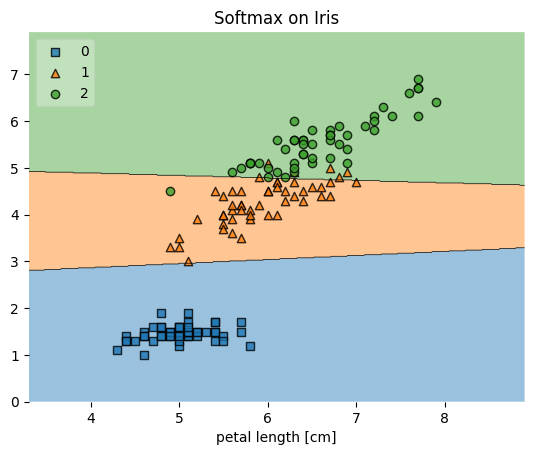

In [85]:
from mlxtend.plotting import plot_decision_regions
import numpy as np
plot_decision_regions(df.iloc[:,0:2].values, df.iloc[:,-1].values, logistic_regression, legend=2)

# Adding axes annotations
plt.xlabel('sepal length [cm]')
plt.xlabel('petal length [cm]')
plt.title('Softmax on Iris')

plt.show()

/Users/sadi_/Coding/pythonProject/.venv/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


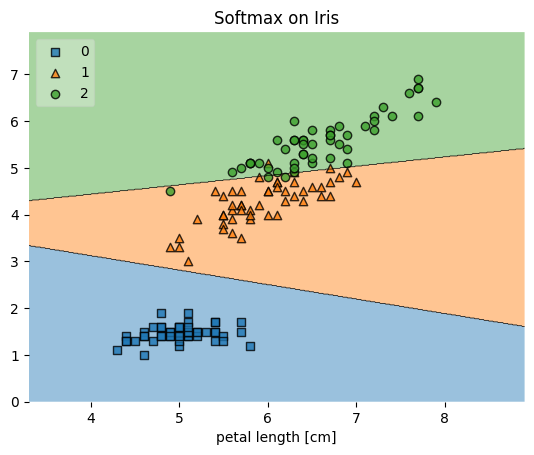

In [86]:
from mlxtend.plotting import plot_decision_regions
import numpy as np
plot_decision_regions(df.iloc[:,0:2].values, df.iloc[:,-1].values, soft_max_regression, legend=2)

# Adding axes annotations
plt.xlabel('sepal length [cm]')
plt.xlabel('petal length [cm]')
plt.title('Softmax on Iris')

plt.show()